# Laporan Proyek Machine Learning - Rosyd Panjie Laras

## Project Overview


Dalam era digital saat ini, pembelajaran online telah menjadi bagian penting dari pendidikan dan pengembangan pribadi. Platform pembelajaran online, seperti Coursera, telah memberikan akses luas kepada ribuan kursus dari berbagai bidang dan disajikan dengan cara yang mudah diakses oleh pengguna. Namun, keberagaman besar kursus yang tersedia sering kali menjadi tantangan bagi pengguna dalam menemukan kursus yang paling sesuai dengan minat, kebutuhan, dan tujuan belajar mereka.

Proyek ini bertujuan untuk mengatasi tantangan tersebut dengan mengembangkan sebuah sistem rekomendasi yang cerdas dan efektif menggunakan metode content-based filtering. Dengan menggunakan pendekatan ini, proyek ini akan membantu pengguna Coursera dalam menavigasi melalui kerumitan pilihan kursus dan memberikan rekomendasi yang personal dan relevan berdasarkan analisis konten kursus.

## Business Understanding

### Problem Statements
- Bagaimana cara mengembangkan sistem rekomendasi yang dapat merekomendasikan kursus-kursus yang relevan dengan preferensi pengguna di Coursera?

### Goals
Mengembangkan sistem rekomendasi menggunakan pendekatan content-based filtering untuk memberikan rekomendasi kursus yang paling sesuai dengan minat dan kebutuhan belajar pengguna. Dengan model ini, diharapkan pengguna Coursera dapat lebih efisien dalam menemukan kursus-kursus yang relevan dengan minat mereka, mengoptimalkan waktu belajar, dan mencapai tujuan pembelajaran dengan lebih baik.

### Solution Approach
Solusi yang diajukan dalam proyek ini mencakup langkah-langkah berikut:

- Pengumpulan dan Pembersihan Data: Langkah pertama adalah mengumpulkan dataset yang berisi informasi tentang kursus-kursus di platform Coursera, termasuk atribut-atribut seperti nama kursus, deskripsi, keterampilan yang diajarkan, dan tingkat kesulitan. Setelah itu, kami akan melakukan pembersihan data dengan mengatasi nilai yang hilang atau duplikat yang mungkin memengaruhi kualitas rekomendasi.

- Teknik Preprocessing: Preprocessing dilakukan untuk memastikan data siap digunakan dalam melatih dan menguji model. Langkah-langkah dalam tahapan ini meliputi:
    1. Menghapus duplikat pada kolom 'Course Name'
    2. Menghapus nilai 'Not Calibrated'
    3. Mengubah tipe data 'Course Rating' menjadi float
    4. Menghapus nilai 'Course Rating' yang kurang dari 4
    5. Menggabungkan nilai dari kolom 'Course Description', 'Skills', dan 'Difficulty Level',
    6. Menghapus tanda baca, tanda kurung, dan karakter khusus lainnya.

- Pengembangan model rekomendasi: Model dikembangkan dengan menerapkan metode content-based filtering menggunakan pendekatan TF-IDF (Term Frequency-Inverse Document Frequency) untuk menganalisis konten kursus. Penghitungan kemiripan kosinus antara kursus dilakukan berdasarkan matriks TF-IDF. 

### Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

### Read Datasets

In [3]:
df = pd.read_csv('Coursera.csv')
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


Feature

- Course Name: Nama-nama kursus sebagai pengenal utama dan dasar rekomendasi.
- Course Description: Ringkasan isi dan tujuan kursus, relevan untuk minat serupa.
- Skills: Kemampuan yang ingin ditanamkan, relevan dengan minat pengguna.
- Difficulty Level: Tingkat kesulitan kursus, sesuai keahlian dan tujuan.
- University: Informasi penyelenggara kursus.
- Course URL: Tautan ke kursus di Coursera, tanpa signifikansi dalam rekomendasi.

In [5]:
# Print the count of null values in each column
print("Null Value Counts:")
print(df.isnull().sum())

Null Value Counts:
Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64


In [6]:
print(f"Dataset size: {df.shape}")

Dataset size: (3522, 7)


In [7]:
# Calculate the sum of duplicated values in the 'Course Name' column
duplicates_count = df['Course Name'].duplicated().sum()

# Print the count of duplicated values
print("Jumlah duplikat pada kolom Course Name:", duplicates_count)

# Find and print duplicate rows based on 'Course Name'
duplicated_rows = df[df['Course Name'].duplicated(keep=False)]
duplicated_rows

Jumlah duplikat pada kolom Course Name: 106


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
43,Introduction to Cybersecurity Tools & Cyber At...,IBM,Beginner,4.3,https://www.coursera.org/learn/introduction-cy...,This course gives you the background needed to...,cyber-security regulation cyber security stan...
44,Introduction to Cybersecurity Tools & Cyber At...,IBM,Beginner,4.3,https://www.coursera.org/learn/introduction-cy...,This course gives you the background needed to...,cyber-security regulation cyber security stan...
94,Guided Imagery,University of Minnesota,Intermediate,4.8,https://www.coursera.org/learn/guided-imagery,"In this course, you will learn how you can use...",functional medicine music meditation counse...
96,Building Resilient Streaming Analytics Systems...,Google Cloud,Advanced,4.6,https://www.coursera.org/learn/streaming-analy...,*Note: this is a new course with updated conte...,Cloud Computing bigquery bigtable dataflow ...
158,Guided Imagery,University of Minnesota,Intermediate,4.8,https://www.coursera.org/learn/guided-imagery,"In this course, you will learn how you can use...",functional medicine music meditation counse...
...,...,...,...,...,...,...,...
3491,Applied Data Science Capstone,IBM,Beginner,4.6,https://www.coursera.org/learn/applied-data-sc...,This capstone project course will give you a t...,Algorithms data clustering algorithms web a...
3499,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
3500,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
3503,Copyright Law in the Music Business,Berklee College of Music,Intermediate,4.7,https://www.coursera.org/learn/copyright-law-m...,In this course taught by E. Michael Harrington...,public domain trademarks Intellectual Proper...


In [8]:
df['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: count, dtype: int64

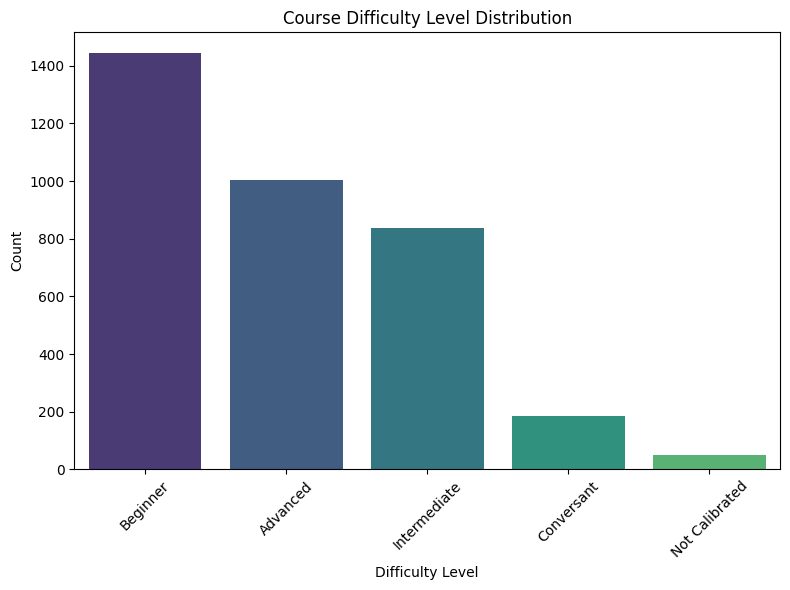

In [9]:
# Get value counts of the 'Difficulty Level' column
difficulty_counts = df['Difficulty Level'].value_counts()

# Set Seaborn style and color palette
sns.set_palette("viridis")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values)
plt.title('Course Difficulty Level Distribution')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Data menunjukkan bahwa terdapat 1444 kursus dengan tingkat kesulitan "Beginner", yang menandakan adanya fokus pada memudahkan pemula untuk memulai belajar hal baru di platform Coursera. 

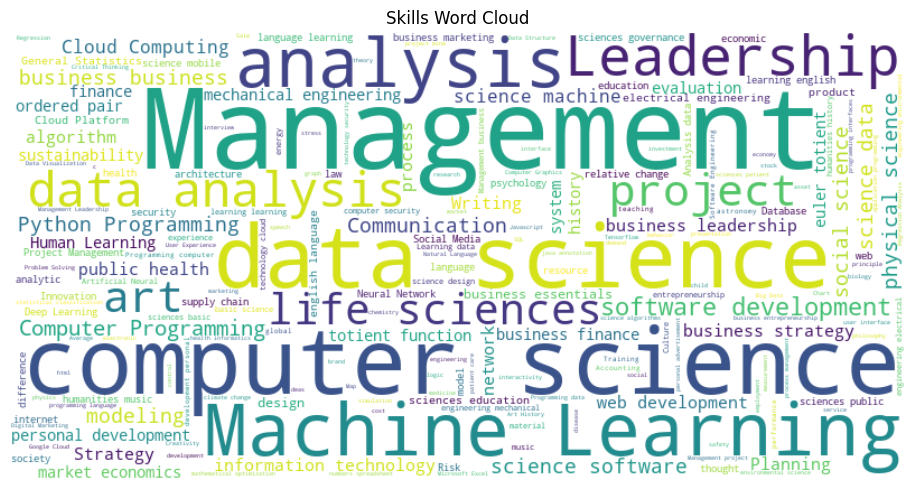

In [10]:
# Combine all skills into a single string
all_skills = ' '.join(df['Skills'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Skills Word Cloud')
plt.axis('off')  # Turn off axis
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
from collections import Counter
# Get the word frequencies from the word cloud
word_freq = wordcloud.words_

# Print the top 5 most frequent words
top_words = Counter(word_freq).most_common(5)
for word, freq in top_words:
    print(f"'{word}'")

'Management'
'computer science'
'data science'
'Machine Learning'
'analysis'


Word cloud menunjukkan lima kata yang paling sering muncul dalam deskripsi kursus: 'Management', 'Computer Science', 'Data Science', 'Machine Learning', dan 'Analysis'. Kata-kata ini mencerminkan tema utama dan fokus kursus-kursus dalam dataset, dengan penekanan pada bisnis, teknologi, data, dan analitik.

### Data Preprocessing

In [12]:
# Drop duplicates on Course Name
df = df.drop_duplicates(subset='Course Name', keep='first')

In [13]:
# Remove values 'Not Calibrated'
df = df[df['Course Rating'] != 'Not Calibrated']

# Change dtypes of Course Rating to Float
df['Course Rating'] = df['Course Rating'].astype(float)

Langkah ini bertujuan agar sistem lebih mudah mengenali kursus yang relevan, yaitu kursus dengan rating di atas 4.5.

In [14]:
# Combine values from 'Course Description', 'Skills', and 'Difficulty Level'
df['Combined'] = df['Course Description'] + ' ' + df['Skills'] + ' ' + df['Difficulty Level']

# Remove punctuation marks, parentheses, and other special characters
df['Combined'] = df['Combined'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Combined
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,By the end of this guided project you will be ...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,This course consists of a general presentation...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,When it comes to numbers there is always more ...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,In this course youll learn how to effectively ...


Teks dari "Course Description", "Skills", dan "Difficulty Level" digabungkan menjadi satu untuk memberikan informasi lengkap tentang kursus. Ini memungkinkan model memahami karakteristik kursus dengan lebih baik menggunakan pendekatan TF-IDF, menghasilkan representasi vektor yang lebih akurat.

### Model with Content Based Filtering

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# Create a TfidfVectorizer
tf = TfidfVectorizer()

# Fit and transform the vectorizer on the combined text data
tfidf_matrix = tf.fit_transform(df['Combined'])

# Get feature names
feature_names = tf.get_feature_names_out()

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Print the dense representation of the TF-IDF matrix
print(tfidf_matrix.todense())

TF-IDF Matrix Shape: (3334, 23843)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Calculate cosine similarity on matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim.shape

(3334, 3334)

In [17]:
def recommend(course, cosine_sim=cosine_sim, n=10):
    # Find the index of the given course in the DataFrame
    course_index = df[df['Course Name'] == course].index[0]
    
    # Calculate similarity scores between the given course and all other courses
    similar_courses = list(enumerate(cosine_sim[course_index]))

    # Sort the similar courses by similarity score in descending order
    similar_courses = sorted(similar_courses, key=lambda x: x[1], reverse=True)
    
    recommended_courses = []
    for index, score in similar_courses[:n]:
        rec_course = df.iloc[index]['Course Name']
        rec_score = df.iloc[index]['Course Rating']  # Tambah ini untuk mendapatkan nilai Course Rating
        recommended_courses.append((rec_course, rec_score, score))
    
    return recommended_courses

recommended_courses = recommend('Retrieve Data using Single-Table SQL Queries')

print(f"Top {len(recommended_courses)} Recommended Courses for 'Retrieve Data using Single-Table SQL Queries':")
for course, rating, score in recommended_courses:
    print(f"Recommended: {course}, Course Rating: {rating}, Similarity Score: {score:.2f}")


Top 10 Recommended Courses for 'Retrieve Data using Single-Table SQL Queries':
Recommended: Retrieve Data using Single-Table SQL Queries, Course Rating: 4.6, Similarity Score: 1.00
Recommended: Creating Database Tables with SQL, Course Rating: 4.6, Similarity Score: 0.58
Recommended: Create Relational Database Tables Using SQLiteStudio, Course Rating: 4.7, Similarity Score: 0.55
Recommended: Manipulating Data with SQL, Course Rating: 4.6, Similarity Score: 0.53
Recommended: Advanced SQL Retrieval Queries in SQLiteStudio, Course Rating: 4.6, Similarity Score: 0.50
Recommended: Querying Databases Using SQL SELECT statement, Course Rating: 4.6, Similarity Score: 0.48
Recommended: Build a Database from a Relational Model, Course Rating: 4.8, Similarity Score: 0.48
Recommended: Advanced Relational Database and SQL, Course Rating: 4.6, Similarity Score: 0.48
Recommended: Intermediate Relational Database and SQL, Course Rating: 4.4, Similarity Score: 0.47
Recommended: Databases and SQL for Da

## Evaluation

Pada tahap evaluasi ini, metrik presisi dan recall digunakan untuk mengukur performa model sistem rekomendasi berbasis konten yang telah dibuat. Kursus-kursus yang direkomendasikan dengan skor kemiripan di atas 4.5 dianggap "relevant" berdasarkan rating tinggi. Dengan menghitung jumlah kursus "relevant" dan kursus yang direkomendasikan yang juga "relevant", presisi dan recall dapat dihitung.

In [20]:
df['Course Rating'].describe()

count    3334.000000
mean        4.552220
std         0.340927
min         1.000000
25%         4.500000
50%         4.600000
75%         4.800000
max         5.000000
Name: Course Rating, dtype: float64

In [18]:
actual_relevant = [course for course, rating, _ in recommended_courses if rating > 4.5]
relevant_count = len(actual_relevant)
relevant_in_recommendations = [course for course, rating, score in recommended_courses if course in actual_relevant]

if len(recommended_courses) > 0:
    precision = len(relevant_in_recommendations) / len(recommended_courses)
    recall = len(relevant_in_recommendations) / relevant_count
else:
    precision = 0
    recall = 0

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9
Recall: 1.0
